# PyPSA-USA Tutorial

In [2]:
import pypsa
import os

In [3]:
# Wildcards:
num_clusters = 20
interconnect = 'texas'
opts = 'Ep'
ll = 'v1.0'
sector='E'

run_name = 'Tutorial'


resources_folder= os.path.join(os.path.dirname(os.getcwd()),'../', 'resources', run_name)
results_folder = os.path.join(os.path.dirname(os.getcwd()),'../', 'results', run_name)


n_base_network = pypsa.Network(os.path.join(resources_folder, f'{interconnect}/elec_base_network.nc'))
network_elec = pypsa.Network(os.path.join(resources_folder, f'{interconnect}/elec_base_network_l_pp.nc'))
network_s = pypsa.Network(os.path.join(resources_folder, f'{interconnect}/elec_s.nc'))
network_c = pypsa.Network(os.path.join(resources_folder, f'{interconnect}/elec_s_{num_clusters}.nc'))
network_c_ec = pypsa.Network(os.path.join(resources_folder, f'{interconnect}/elec_s_{num_clusters}_ec.nc'))
network_presolve = pypsa.Network(os.path.join(resources_folder, f'{interconnect}/elec_s_{num_clusters}_ec_l{ll}_{opts}_{sector}.nc'))
network_solved = pypsa.Network(os.path.join(results_folder, f'{interconnect}/networks/elec_s_{num_clusters}_ec_l{ll}_{opts}_{sector}.nc'))

INFO:pypsa.io:Imported network elec_base_network.nc has buses, lines, line_types, transformers
INFO:pypsa.io:Imported network elec_base_network_l_pp.nc has buses, carriers, generators, lines, line_types, loads, storage_units, transformers
INFO:pypsa.io:Imported network elec_s.nc has buses, carriers, generators, lines, loads, storage_units
INFO:pypsa.io:Imported network elec_s_20.nc has buses, carriers, generators, lines, loads, storage_units
INFO:pypsa.io:Imported network elec_s_20_ec.nc has buses, carriers, generators, lines, loads, storage_units
INFO:pypsa.io:Imported network elec_s_20_ec_lv1.0_Ep_E.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units
INFO:pypsa.io:Imported network elec_s_20_ec_lv1.0_Ep_E.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units


### Base Network
Reads in Breakthrough Energy/TAMU transmission dataset, and converts it into PyPSA compatible components. A base netowork file (`*.nc`) is written out. Included in this network are: Bus-Region memberships, Geolocated buses, Geoloactated AC and DC transmission lines + links, Transformers

In [4]:
n_base_network

PyPSA Network 'PyPSA-USA'
Components:
 - Bus: 2082
 - Line: 2387
 - Transformer: 901
Snapshots: 1

### Add Electricity
This module integrates data produced by `build_renewable_profiles`, `build_demand`, `build_cost_data`, `build_fuel_prices`, and `build_base_network` to create a network model that includes generators, demand, and costs. The module attaches generators, storage units, and loads to the network created by `build_base_network`. Each generator is assigned regional capital costs, and regional and daily or monthly marginal costs.

In [5]:
network_elec

PyPSA Network 'PyPSA-USA'
Components:
 - Bus: 2082
 - Carrier: 14
 - Generator: 5300
 - Line: 2387
 - Load: 1125
 - StorageUnit: 58
 - Transformer: 901
Snapshots: 744

In [6]:
network_elec.generators

,carrier,bus,p_nom_min,p_nom,p_nom_extendable,efficiency,marginal_cost,capital_cost,build_year,p_nom_max,...,stand_by_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
C536_298_1,coal,3008067,893.0,893.0,True,0.395,17.249900,18890.143241,1985,inf,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
C537_298_2,coal,3008067,956.8,956.8,True,0.395,17.249900,18890.143241,1986,inf,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
C5119_3439_4,OCGT,3004113,131.8,131.8,True,0.293,66.479092,6026.144276,2008,inf,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
C5120_3439_5,OCGT,3004113,131.8,131.8,True,0.470,43.812757,6026.144276,2008,inf,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
C5121_3441_7,CCGT,3004161,351.0,351.0,True,0.531,34.959650,6670.044778,1972,inf,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13206,hydro,3006274,0.0,0.0,False,0.900,0.000000,14150.350110,0,inf,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
13461,hydro,3002063,80.0,80.0,False,0.900,0.000000,14150.350110,0,inf,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
13462,hydro,3003050,75.8,75.8,False,0.900,0.000000,14150.350110,0,inf,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0


### Simplified Network
Aggregates network to substations and simplifies to a single voltage level, and trims spur line-ends.

In [7]:
network_s

PyPSA Network
Components:
 - Bus: 1291
 - Carrier: 14
 - Generator: 2724
 - Line: 1931
 - Load: 1125
 - StorageUnit: 41
Snapshots: 744

### Cluster Network
Creates networks clustered to ``{cluster}`` number of zones with aggregated
buses, generators and transmission corridors.

In [8]:
network_c

PyPSA Network
Components:
 - Bus: 20
 - Carrier: 14
 - Generator: 116
 - Line: 42
 - Load: 20
 - StorageUnit: 13
Snapshots: 744

/var/folders/00/vqry7y9s78q3rvf_m_jmk_bc0000gn/T/ipykernel_3914/965407388.py:1: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.



<Axes: xlabel='snapshot'>

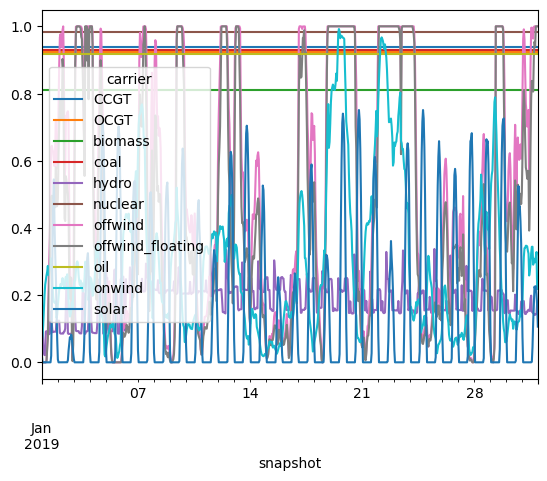

In [9]:
network_c.generators_t.p_max_pu.groupby(network_c.generators.carrier, axis=1).mean().plot()

### Add Extra Components
Adds extendible components like battery energy storage, extendable conventional plants, and hydrogen infrastructure to the simplified network.


In [10]:
network_c_ec

PyPSA Network
Components:
 - Bus: 20
 - Carrier: 15
 - Generator: 159
 - Line: 42
 - Load: 20
 - StorageUnit: 33
Snapshots: 744

### Prepare Network
Prepare PyPSA network for solving according to `opts` and `ll`, such
as.
- adding an annual **limit** of carbon-dioxide emissions,
- adding an exogenous **price** per tonne emissions of carbon-dioxide (or other kinds),
- setting an **N-1 security margin** factor for transmission line capacities,
- specifying an expansion limit on the **cost** of transmission expansion,
- specifying an expansion limit on the **volume** of transmission expansion, and
- reducing the **temporal** resolution by averaging over multiple hours
  or segmenting time series into chunks of varying lengths using ``tsam``.

In [11]:
network_presolve.global_constraints

,type,carrier_attribute,sense,constant,investment_period,mu
GlobalConstraint,,,,,,
lv_limit,transmission_volume_expansion_limit,"AC, DC",<=,3.405114e+07,NaN,0.0


In [12]:
network_presolve.optimize(solver_name="gurobi")

INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy.gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-01-04


INFO:gurobipy.gurobipy:Academic license - for non-commercial use only - expires 2025-01-04
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 20.74it/s]
INFO:linopy.io: Writing time: 3.42s


Read LP format model from file /private/var/folders/00/vqry7y9s78q3rvf_m_jmk_bc0000gn/T/linopy-problem-nltrsrkk.lp


INFO:gurobipy.gurobipy:Read LP format model from file /private/var/folders/00/vqry7y9s78q3rvf_m_jmk_bc0000gn/T/linopy-problem-nltrsrkk.lp


Reading time = 1.18 seconds


INFO:gurobipy.gurobipy:Reading time = 1.18 seconds


obj: 503185 rows, 223353 columns, 981320 nonzeros


INFO:gurobipy.gurobipy:obj: 503185 rows, 223353 columns, 981320 nonzeros


Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[x86])


INFO:gurobipy.gurobipy:Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[x86])


INFO:gurobipy.gurobipy:


CPU model: Intel(R) Core(TM) i7-1068NG7 CPU @ 2.30GHz


INFO:gurobipy.gurobipy:CPU model: Intel(R) Core(TM) i7-1068NG7 CPU @ 2.30GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy.gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy.gurobipy:


Optimize a model with 503185 rows, 223353 columns and 981320 nonzeros


INFO:gurobipy.gurobipy:Optimize a model with 503185 rows, 223353 columns and 981320 nonzeros


Model fingerprint: 0x484b4873


INFO:gurobipy.gurobipy:Model fingerprint: 0x484b4873


Coefficient statistics:


INFO:gurobipy.gurobipy:Coefficient statistics:


  Matrix range     [4e-05, 1e+03]


INFO:gurobipy.gurobipy:  Matrix range     [4e-05, 1e+03]


  Objective range  [1e+00, 4e+04]


INFO:gurobipy.gurobipy:  Objective range  [1e+00, 4e+04]


  Bounds range     [3e+08, 3e+08]


INFO:gurobipy.gurobipy:  Bounds range     [3e+08, 3e+08]


  RHS range        [1e-03, 6e+05]


INFO:gurobipy.gurobipy:  RHS range        [1e-03, 6e+05]


Presolve removed 315954 rows and 13650 columns


INFO:gurobipy.gurobipy:Presolve removed 315954 rows and 13650 columns


Presolve time: 1.08s


INFO:gurobipy.gurobipy:Presolve time: 1.08s


Presolved: 187231 rows, 209703 columns, 652461 nonzeros


INFO:gurobipy.gurobipy:Presolved: 187231 rows, 209703 columns, 652461 nonzeros


INFO:gurobipy.gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy.gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy.gurobipy:Showing barrier log only...


INFO:gurobipy.gurobipy:


Ordering time: 1.43s


INFO:gurobipy.gurobipy:Ordering time: 1.43s


INFO:gurobipy.gurobipy:


Barrier statistics:


INFO:gurobipy.gurobipy:Barrier statistics:


 Dense cols : 152


INFO:gurobipy.gurobipy: Dense cols : 152


 AA' NZ     : 5.292e+05


INFO:gurobipy.gurobipy: AA' NZ     : 5.292e+05


 Factor NZ  : 4.921e+06 (roughly 200 MB of memory)


INFO:gurobipy.gurobipy: Factor NZ  : 4.921e+06 (roughly 200 MB of memory)


 Factor Ops : 7.370e+08 (less than 1 second per iteration)


INFO:gurobipy.gurobipy: Factor Ops : 7.370e+08 (less than 1 second per iteration)


 Threads    : 3


INFO:gurobipy.gurobipy: Threads    : 3


INFO:gurobipy.gurobipy:


                  Objective                Residual


INFO:gurobipy.gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy.gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   7.11432507e+10 -1.07388238e+13  7.84e+04 1.48e+02  2.79e+08     3s


INFO:gurobipy.gurobipy:   0   7.11432507e+10 -1.07388238e+13  7.84e+04 1.48e+02  2.79e+08     3s


   1   7.09894296e+10 -6.57472822e+12  6.33e+04 5.09e+03  1.52e+08     3s


INFO:gurobipy.gurobipy:   1   7.09894296e+10 -6.57472822e+12  6.33e+04 5.09e+03  1.52e+08     3s


   2   5.10215763e+10 -4.13661252e+12  3.47e+04 1.27e+03  7.39e+07     4s


INFO:gurobipy.gurobipy:   2   5.10215763e+10 -4.13661252e+12  3.47e+04 1.27e+03  7.39e+07     4s


   3   3.06953228e+10 -2.34548458e+12  4.09e+03 1.95e+02  1.22e+07     4s


INFO:gurobipy.gurobipy:   3   3.06953228e+10 -2.34548458e+12  4.09e+03 1.95e+02  1.22e+07     4s


   4   2.45040530e+10 -1.31295693e+12  6.39e+02 7.97e+01  4.00e+06     4s


INFO:gurobipy.gurobipy:   4   2.45040530e+10 -1.31295693e+12  6.39e+02 7.97e+01  4.00e+06     4s


   5   2.11813250e+10 -9.64019170e+11  2.28e+02 5.42e+01  2.60e+06     5s


INFO:gurobipy.gurobipy:   5   2.11813250e+10 -9.64019170e+11  2.28e+02 5.42e+01  2.60e+06     5s


   6   1.91840549e+10 -3.02099470e+11  1.20e+02 1.15e+01  8.31e+05     5s


INFO:gurobipy.gurobipy:   6   1.91840549e+10 -3.02099470e+11  1.20e+02 1.15e+01  8.31e+05     5s


   7   1.10325344e+10 -1.67630792e+11  9.63e+00 5.71e+00  4.14e+05     5s


INFO:gurobipy.gurobipy:   7   1.10325344e+10 -1.67630792e+11  9.63e+00 5.71e+00  4.14e+05     5s


   8   8.79459873e+09 -3.86554648e+10  5.18e+00 5.73e-01  1.07e+05     5s


INFO:gurobipy.gurobipy:   8   8.79459873e+09 -3.86554648e+10  5.18e+00 5.73e-01  1.07e+05     5s


   9   5.96848842e+09 -1.23962184e+10  2.98e+00 5.90e-07  4.01e+04     6s


INFO:gurobipy.gurobipy:   9   5.96848842e+09 -1.23962184e+10  2.98e+00 5.90e-07  4.01e+04     6s


  10   3.45979449e+09 -2.91664671e+09  1.40e+00 4.01e-06  1.36e+04     6s


INFO:gurobipy.gurobipy:  10   3.45979449e+09 -2.91664671e+09  1.40e+00 4.01e-06  1.36e+04     6s


  11   2.34461599e+09 -1.23417938e+09  8.45e-01 3.00e-02  7.59e+03     6s


INFO:gurobipy.gurobipy:  11   2.34461599e+09 -1.23417938e+09  8.45e-01 3.00e-02  7.59e+03     6s


  12   1.59899788e+09 -5.59707978e+08  5.17e-01 2.01e-02  4.56e+03     6s


INFO:gurobipy.gurobipy:  12   1.59899788e+09 -5.59707978e+08  5.17e-01 2.01e-02  4.56e+03     6s


  13   1.34691407e+09 -2.15125144e+08  4.14e-01 5.25e-03  3.30e+03     7s


INFO:gurobipy.gurobipy:  13   1.34691407e+09 -2.15125144e+08  4.14e-01 5.25e-03  3.30e+03     7s


  14   1.05468807e+09 -3.58914994e+07  2.98e-01 4.13e-07  2.30e+03     7s


INFO:gurobipy.gurobipy:  14   1.05468807e+09 -3.58914994e+07  2.98e-01 4.13e-07  2.30e+03     7s


  15   7.98347559e+08  1.24763866e+08  1.97e-01 2.67e-07  1.42e+03     7s


INFO:gurobipy.gurobipy:  15   7.98347559e+08  1.24763866e+08  1.97e-01 2.67e-07  1.42e+03     7s


  16   5.59219009e+08  1.76581714e+08  1.04e-01 1.68e-07  8.05e+02     7s


INFO:gurobipy.gurobipy:  16   5.59219009e+08  1.76581714e+08  1.04e-01 1.68e-07  8.05e+02     7s


  17   4.49127542e+08  2.03819122e+08  6.13e-02 1.17e-07  5.16e+02     8s


INFO:gurobipy.gurobipy:  17   4.49127542e+08  2.03819122e+08  6.13e-02 1.17e-07  5.16e+02     8s


<Axes: xlabel='snapshot'>

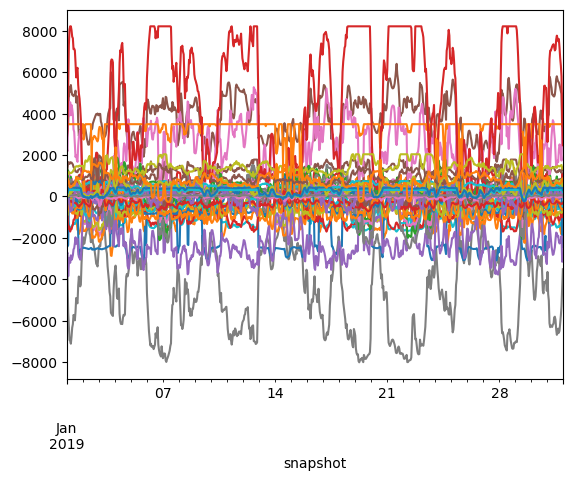

In [ ]:
network_presolve.lines_t.p0.plot(legend=False)

In [ ]:
network_presolve.generators_t.p

Generator,p600 0 CCGT,p600 0 OCGT,p600 0 oil,p600 0 onwind,p600 0 solar,p610 0 OCGT,p610 0 hydro,p610 0 onwind,p610 0 solar,p620 0 CCGT,...,p650 2 OCGT new,p670 0 CCGT new,p670 0 OCGT new,p670 1 CCGT new,p670 1 OCGT new,p670 1 coal new,p670 2 CCGT new,p670 2 OCGT new,p670 4 CCGT new,p670 4 OCGT new
snapshot,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,0.0,0.0,0.0,3499.963083,163.256626,0.0,12.371609,186.897149,324.873161,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 01:00:00,0.0,0.0,0.0,4955.995261,0.000000,0.0,10.773951,271.019657,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 02:00:00,0.0,0.0,0.0,7473.390253,0.000000,0.0,5.366493,666.146698,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 03:00:00,0.0,0.0,0.0,9074.747722,0.000000,0.0,2.403315,1396.019187,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 04:00:00,0.0,0.0,0.0,9990.009463,0.000000,0.0,1.952693,934.009843,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-31 19:00:00,0.0,0.0,0.0,4499.157410,1174.986169,0.0,12.875039,2384.572280,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-31 20:00:00,0.0,0.0,0.0,3677.290991,1207.620644,0.0,13.030604,2931.928950,227.288687,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-31 21:00:00,0.0,0.0,0.0,2840.183459,1092.086378,0.0,13.051938,2336.449087,1350.709920,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Solve Network

In [ ]:
network_solved

PyPSA Network
Components:
 - Bus: 20
 - Carrier: 15
 - Generator: 159
 - GlobalConstraint: 1
 - Line: 42
 - Load: 20
 - StorageUnit: 33
Snapshots: 744